In [1]:
%%sh
./download.sh

In [2]:
import pandas as pd, matplotlib.pyplot as plt

dati=pd.read_json("./data/dati-json/dpc-covid19-ita-regioni.json", convert_dates=["data"])
dati['data'].max()

Timestamp('2022-03-07 17:00:00')

In [3]:
complessiva = dati.groupby("data").sum()
complessiva['nuovi_tamponi'] = complessiva['tamponi'].diff()

[]

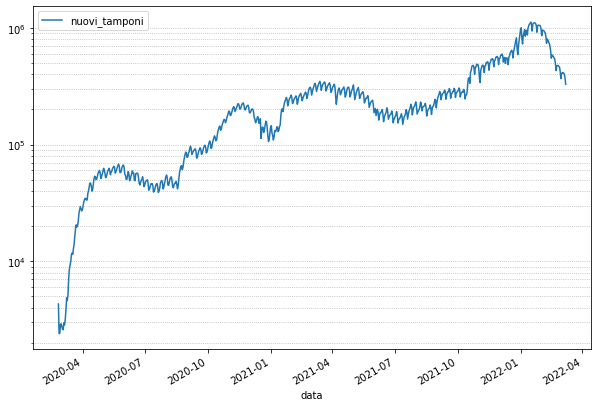

In [4]:
fig, ax = plt.subplots(figsize=(10,7))
complessiva.ewm(span=7).mean().plot(ax=ax, y="nuovi_tamponi")
ax.grid(axis='y', ls=':', which='both')
ax.semilogy()

In [5]:
complessiva['weekday'] = complessiva.index.map(lambda x: x.weekday())
complessiva['ones'] = 1

settimanali = complessiva.groupby("weekday").sum()

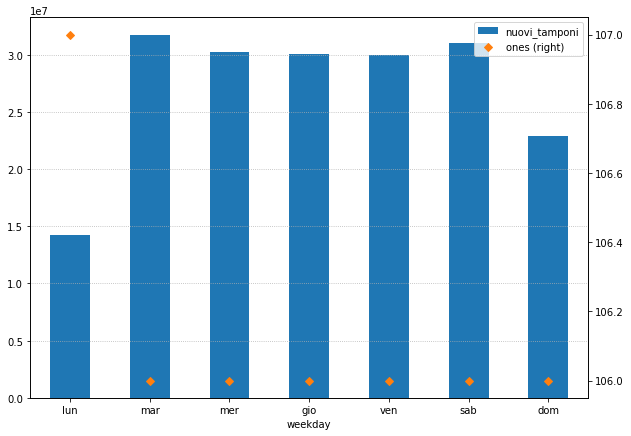

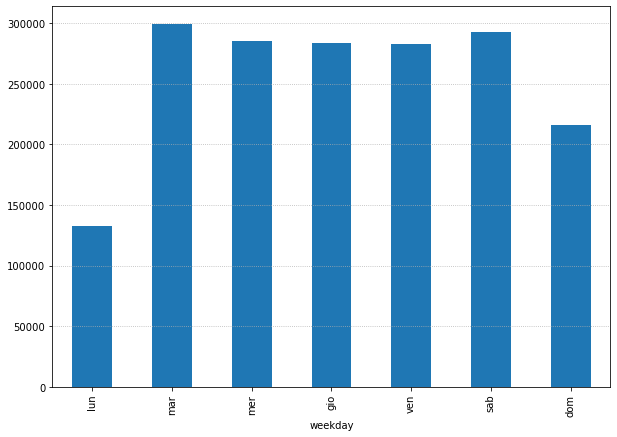

In [6]:
fig, ax = plt.subplots(figsize=(10,7))
settimanali.plot(ax=ax, kind='bar', y=["nuovi_tamponi"])
settimanali.plot(ax=ax, secondary_y=True, kind='line', ls='', marker='D', color="C1", y=["ones"])

fig2, ax2 = plt.subplots(figsize=(10,7))
(settimanali['nuovi_tamponi']/settimanali['ones']).plot(ax=ax2, kind='bar')

for a in [ax, ax2]:
    a.set_xticklabels(["lun", "mar", "mer", "gio", "ven", "sab", "dom"])
    a.grid(axis='y', ls=':')